In [1]:
import sys; sys.path.insert(0, '../database/')
from dataset import *
import pyforest

In [2]:
def easy_plot(i):
    plt.figure()
    plt.imshow(db[i]['img'], cmap='gray' )
    plt.imshow(db[i]['lesion_mask'])
    plt.axis('off')
    plt.show()

In [3]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        max_lesion_diam_mm=1.0,
        extract_patches=True,
        extract_patches_method='all',  # 'centered'
        patch_size=256,
        stride=256,
        min_breast_fraction_roi=0.5,
        normalize=None,
        cropped_imgs=False,
        n_jobs=-1,
)

0      abnormal
1      abnormal
2      abnormal
3      abnormal
4      abnormal
         ...   
291    abnormal
292    abnormal
293    abnormal
294    abnormal
295    abnormal
Name: img_label, Length: 289, dtype: object


In [4]:
img_id =  22579730 # one image for which the problem exists

db.df[db.df.img_id == img_id].index

NameError: name 'db' is not defined

normal
['[(2367, 1675), (2367, 1675)]' '[(2429, 1516), (2429, 1516)]'
 '[(2233, 1435), (2233, 1435)]' '[(2456, 1436), (2456, 1436)]'
 '[(2462, 1437), (2462, 1437)]' '[(2462, 1431), (2462, 1431)]'
 '[(2049, 1949), (2049, 1949)]' '[(2126, 1624), (2126, 1624)]'
 '[(2350, 1675), (2350, 1675)]' '[(2349, 1656), (2349, 1656)]'
 '[(2353, 1662), (2353, 1662)]' '[(2358, 1653), (2358, 1653)]'
 '[(2359, 1664), (2359, 1664)]' '[(2293, 1752), (2293, 1752)]'
 '[(2531, 1442), (2531, 1442)]']
normal
['[(2367, 1675), (2367, 1675)]' '[(2429, 1516), (2429, 1516)]'
 '[(2233, 1435), (2233, 1435)]' '[(2456, 1436), (2456, 1436)]'
 '[(2462, 1437), (2462, 1437)]' '[(2462, 1431), (2462, 1431)]'
 '[(2049, 1949), (2049, 1949)]' '[(2126, 1624), (2126, 1624)]'
 '[(2350, 1675), (2350, 1675)]' '[(2349, 1656), (2349, 1656)]'
 '[(2353, 1662), (2353, 1662)]' '[(2358, 1653), (2358, 1653)]'
 '[(2359, 1664), (2359, 1664)]' '[(2293, 1752), (2293, 1752)]'
 '[(2531, 1442), (2531, 1442)]']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

normal
['[(2367, 1675), (2367, 1675)]' '[(2429, 1516), (2429, 1516)]'
 '[(2233, 1435), (2233, 1435)]' '[(2456, 1436), (2456, 1436)]'
 '[(2462, 1437), (2462, 1437)]' '[(2462, 1431), (2462, 1431)]'
 '[(2049, 1949), (2049, 1949)]' '[(2126, 1624), (2126, 1624)]'
 '[(2350, 1675), (2350, 1675)]' '[(2349, 1656), (2349, 1656)]'
 '[(2353, 1662), (2353, 1662)]' '[(2358, 1653), (2358, 1653)]'
 '[(2359, 1664), (2359, 1664)]' '[(2293, 1752), (2293, 1752)]'
 '[(2531, 1442), (2531, 1442)]']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

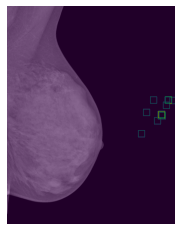

In [5]:
roi_mask = np.zeros(db[38]['img'].shape)
for i in db[38]['lesion_bboxes']:
    roi_mask = cv2.rectangle(roi_mask, (i[0][0]-50, i[0][1]-50), (i[1][0]+50, i[1][1]+50), 255, 3)
plt.figure()
plt.imshow(db[38]['img'], cmap='gray' )
plt.imshow(roi_mask, alpha=0.5)
plt.axis('off')
plt.show()

In [6]:
db[38]['side']

normal
['[(2367, 1675), (2367, 1675)]' '[(2429, 1516), (2429, 1516)]'
 '[(2233, 1435), (2233, 1435)]' '[(2456, 1436), (2456, 1436)]'
 '[(2462, 1437), (2462, 1437)]' '[(2462, 1431), (2462, 1431)]'
 '[(2049, 1949), (2049, 1949)]' '[(2126, 1624), (2126, 1624)]'
 '[(2350, 1675), (2350, 1675)]' '[(2349, 1656), (2349, 1656)]'
 '[(2353, 1662), (2353, 1662)]' '[(2358, 1653), (2358, 1653)]'
 '[(2359, 1664), (2359, 1664)]' '[(2293, 1752), (2293, 1752)]'
 '[(2531, 1442), (2531, 1442)]']


'R'

In [6]:
db =  INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_diam_mm=1.0,
        extract_patches=True,
        extract_patches_method='center',  # 'centered'
        patch_size=128,
        stride=64,
        min_breast_fraction_roi=0.9,
        cropped_imgs=False,
        normalize='min_max',
        n_jobs=3
)

100%|██████████| 296/296 [06:20<00:00,  1.28s/it]


In [ ]:
# db.df.loc[db.df.img_id==22614499]

In [ ]:
for i in range(300):
    if db[i]['lab'] == 'abnormal':
        easy_plot(i)

In [3]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_size_mm=1.0,
        extract_rois=False,
        extract_rois_method='all',  # 'centered'
        roi_size=256,
        stride=256,
        min_breast_fraction_roi=0.8,
        normalize=None,
        n_jobs=-1,
)

TypeError: __init__() got an unexpected keyword argument 'max_lesion_size_mm'